<a href="https://colab.research.google.com/github/NguyenMai2001/YOLOV3/blob/master/roboflow_pytorch_chess_tk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import torch
from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.9.0+cu111 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [ ]:
!git clone https://github.com/roboflow-ai/yolov3 

Cloning into 'yolov3'...
remote: Enumerating objects: 8443, done.
remote: Total 8443 (delta 0), reused 0 (delta 0), pack-reused 8443
Receiving objects: 100% (8443/8443), 6.89 MiB | 15.01 MiB/s, done.
Resolving deltas: 100% (5825/5825), done.


In [ ]:
!curl -L https://public.roboflow.com/ds/HWcOwRkR81?key=MEn1hObpwL | jar -x

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   891  100   891    0     0    846      0  0:00:01  0:00:01 --:--:--   846
 99 16.8M   99 16.7M    0     0  4632k      0  0:00:03  0:00:03 --:--:-- 11.6M
curl: (23) Failed writing body (4096 != 8192)


#Sắp xếp dữ liệu và nhãn

In [ ]:
%cd train

/content/train


In [ ]:
%ls

In [ ]:
%mkdir labels
%mkdir images

In [ ]:
%mv *.jpg ./images/
%mv *.txt ./labels/

In [ ]:
%cd images

/content/train/images


In [ ]:
# create Ultralytics specific text file of training images
file = open("train_images_roboflow.txt", "w") 
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "train_images_roboflow.txt":
        pass
      else:
        file.write("../train/images/" + filename + "\n")
file.close()

In [ ]:
%cat train_images_roboflow.txt

In [ ]:
%cd ../../valid

/content/valid


In [ ]:
%mkdir labels
%mkdir images

In [ ]:
%mv *.jpg ./images/
%mv *.txt ./labels/

In [ ]:
%cd images

/content/valid/images


In [ ]:
# create Ultralytics specific text file of validation images
file = open("valid_images_roboflow.txt", "w") 
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "valid_images_roboflow.txt":
        pass
      else:
        file.write("../valid/images/" + filename + "\n")
file.close()

In [ ]:
%cat valid_images_roboflow.txt

#Thiết lập model config

In [ ]:
%cd ../../yolov3/data

/content/yolov3/data


In [ ]:
%cat ../../train/_darknet.labels

bishop
black-bishop
black-king
black-knight
black-pawn
black-queen
black-rook
white-bishop
white-king
white-knight
white-pawn
white-queen
white-rook

In [ ]:
%cat ../../train/_darknet.labels > ../../train/roboflow_data.names

In [ ]:
def get_num_classes(labels_file_path):
    classes = 0
    with open(labels_file_path, 'r') as f:
      for line in f:
        classes += 1
    return classes

In [ ]:
# update the roboflow.data file with correct number of classes
import re

num_classes = get_num_classes("../../train/_darknet.labels")
with open("roboflow.data") as f:
    s = f.read()
with open("roboflow.data", 'w') as f:
    
    # Set number of classes num_classes.
    s = re.sub('classes=[0-9]+',
               'classes={}'.format(num_classes), s)
    f.write(s)

In [ ]:
%cat roboflow.data

classes=13
train=../train/images/train_images_roboflow.txt
valid=../valid/images/valid_images_roboflow.txt
names=../train/roboflow_data.names


#Train model

In [ ]:
%cd ../

/content/yolov3


In [ ]:
!python3 train.py --data data/roboflow.data --epochs 10

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/roboflow.data', device='', epochs=10, evolve=False, img_size=[416], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, var=None, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (606 found, 0 missing, 0 empty, 3 duplicate, for 606 images): 100% 606/606 [00:00<00:00, 4019.47it/s]
Caching labels (58 found, 0 missing, 0 empty, 0 duplicate, for 58 images): 100% 58/58 [00:00<00:00, 4591.90it/s]
Using 2 dataloader workers
Starting training for 10 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
  0% 0/38 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all t

#Hiện thị hiệu suất train

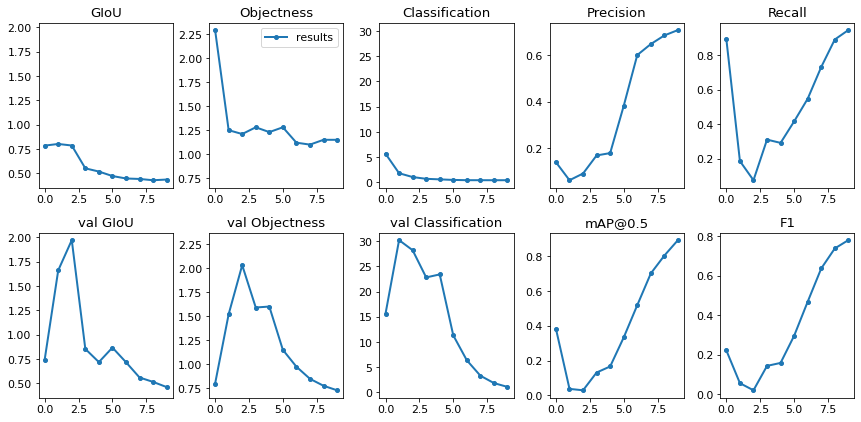

In [ ]:
from utils import utils; utils.plot_results()

In [ ]:
!python3 detect.py --weights weights/last.pt --source=../test --names=../train/roboflow_data.names

#Hiện thị kết quả

In [ ]:
# import libraries for display
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Image
from glob import glob
import random
import PIL

IMG_0159_JPG.rf.f0d34122f8817d538e396b04f2b70d33.jpg


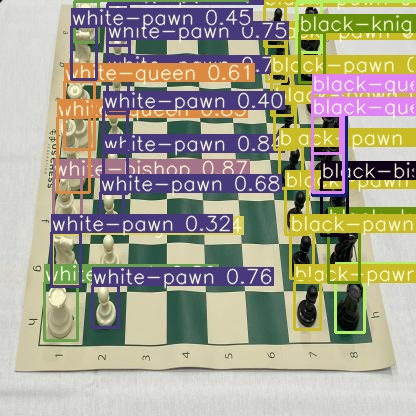

In [ ]:
# plot just one random image prediction
filename = random.choice(os.listdir('./output'))
print(filename)
Image('./output/' + filename)

In [ ]:
# grab all images from our output directory
images = [ PIL.Image.open(f) for f in glob('./output/*') ]

In [ ]:
# convert images to numPy
def img2array(im):
    if im.mode != 'RGB':
        im = im.convert(mode='RGB')
    return np.fromstring(im.tobytes(), dtype='uint8').reshape((im.size[1], im.size[0], 3))

In [ ]:
# create array of numPy images
np_images = [ img2array(im) for im in images ]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


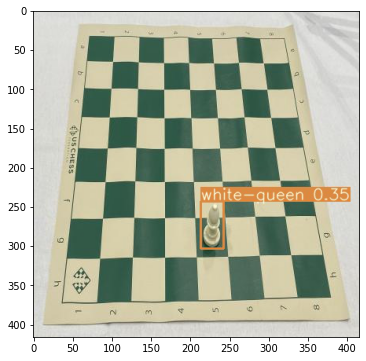

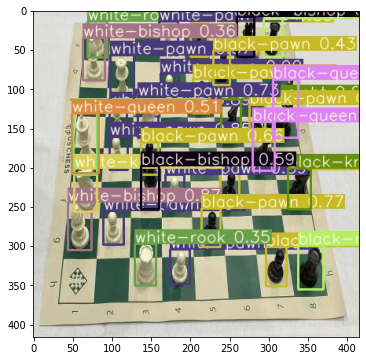

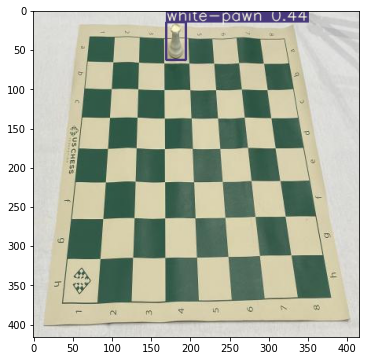

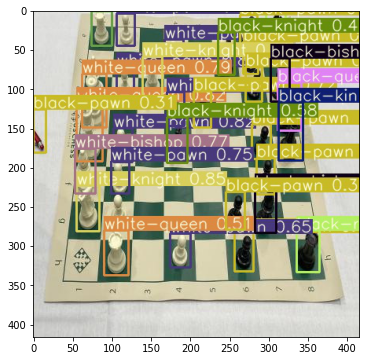

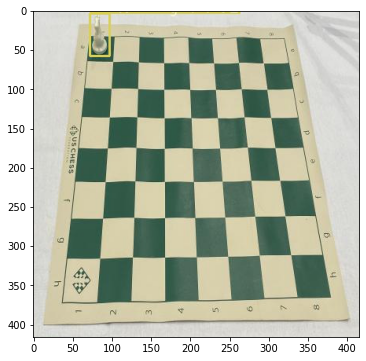

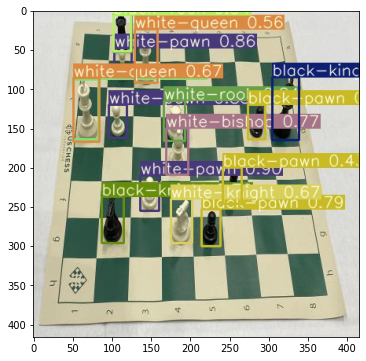

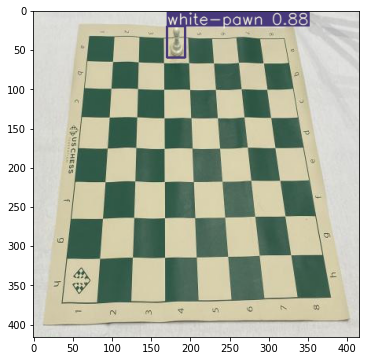

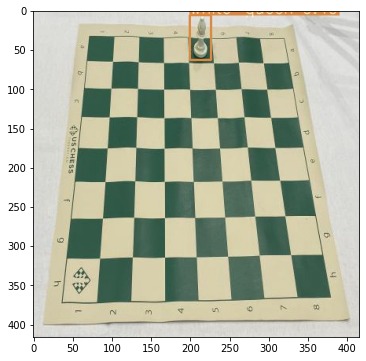

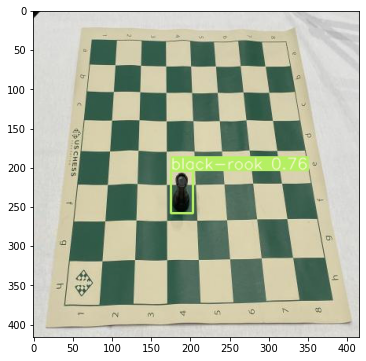

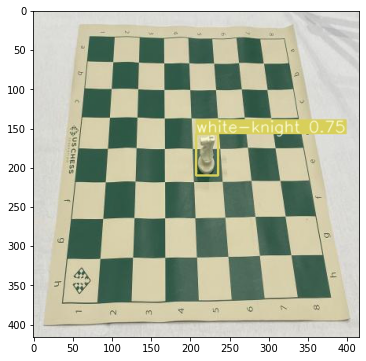

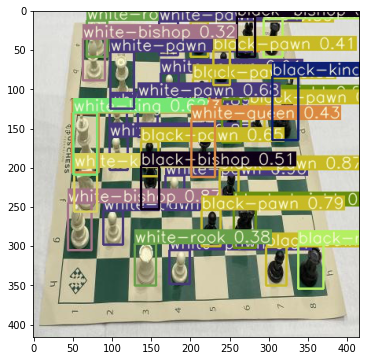

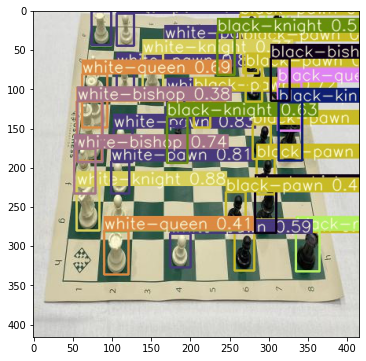

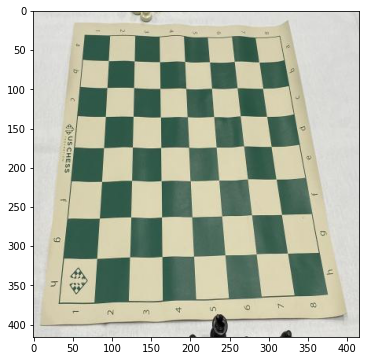

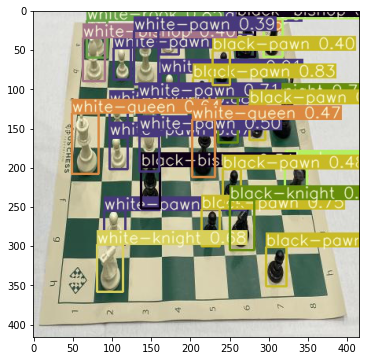

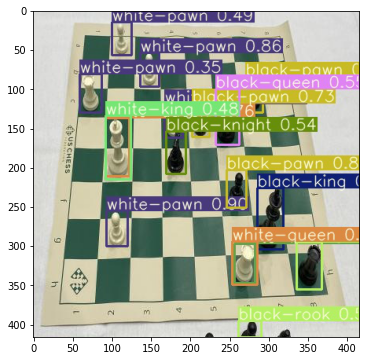

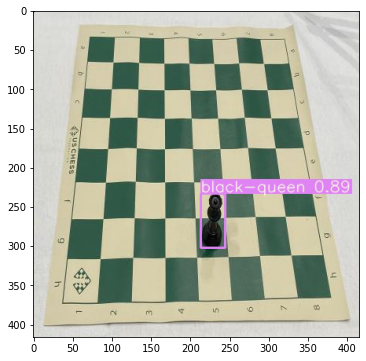

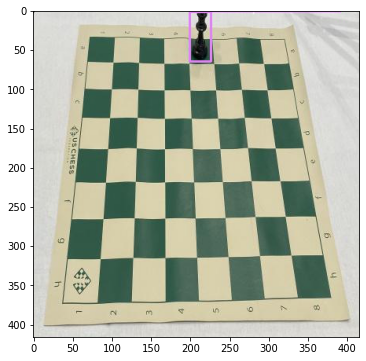

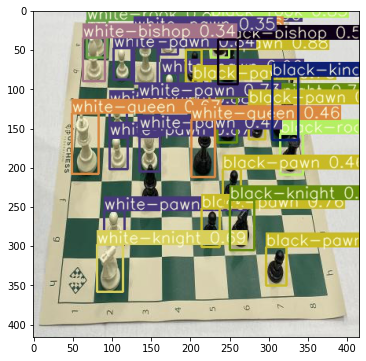

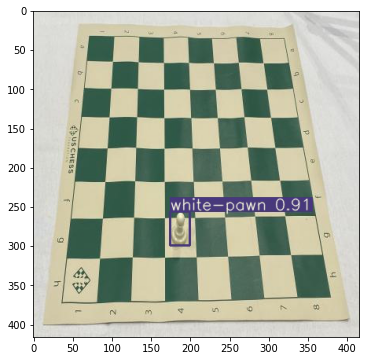

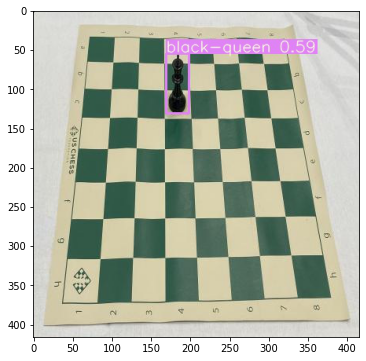

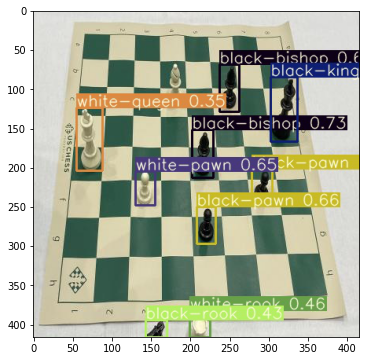

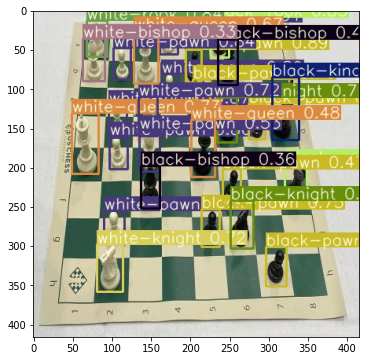

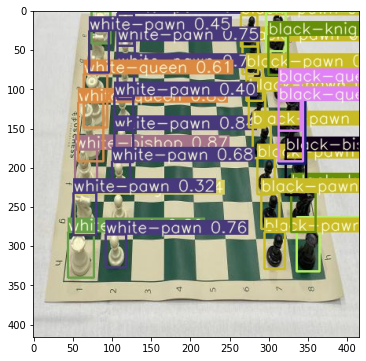

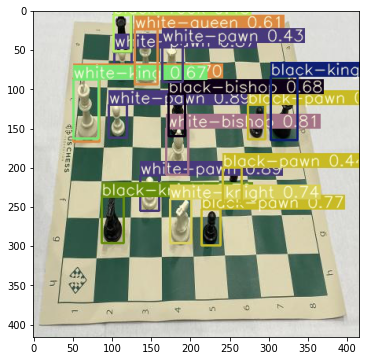

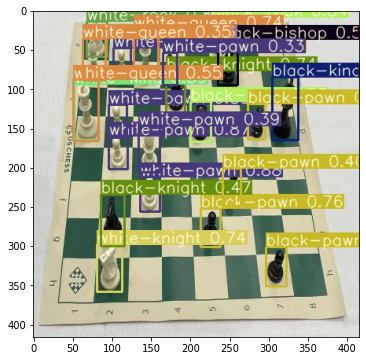

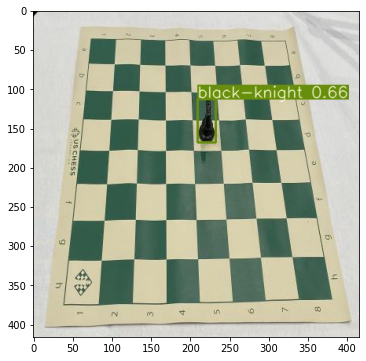

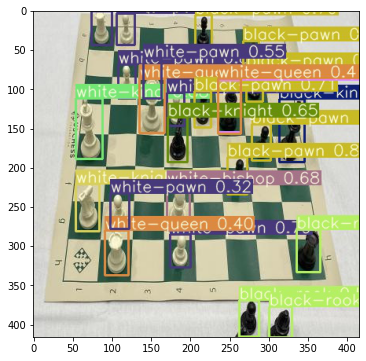

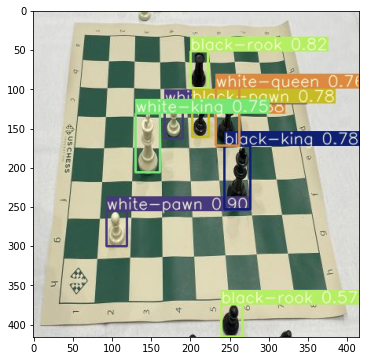

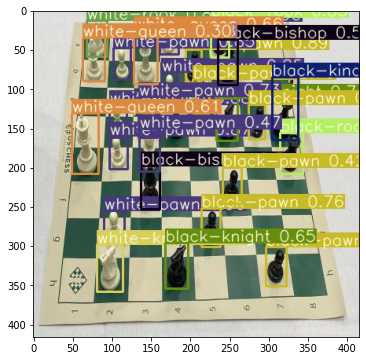

In [ ]:
# plot ALL results in test directory (NOTE: adjust figsize as you please)
for img in np_images:
    plt.figure(figsize=(8, 6))
    plt.imshow(img)

In [ ]:
# save locally
from google.colab import files
files.download('./weights/last.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# connect Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%pwd

'/content/yolov3'

In [ ]:
# create a copy of the weights file with a datetime 
# and move that file to your own Drive
%cp ./weights/last.pt ./weights/last_copy.pt
%mv ./weights/last_copy.pt /content/gdrive/My\ Drive